In [1]:
import pandas as pd

In [2]:
data= pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
data.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [5]:
data.shape

(10000, 14)

In [6]:
print("Number of rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of rows: 10000
Number of Columns: 14


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Check null values in dataset
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#Get overall statistics about the dataset
data.describe(include = 'all')

RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age        Tenure        Balance  NumOfProducts    HasCrCard  \
count   10000.000000  10000.000000   10000.000000   10000.000000  10000.00000   
unique           NaN           NaN            NaN            NaN          NaN   
top              NaN           NaN            NaN            NaN          NaN   
freq             NaN           NaN            NaN            NaN          NaN   
mean       38.921800      5.012800   76485.889288       1.530200      0.70550   
std        10.487806      2.892174   62397.405202       0.581654      0.45584   
min        18.000000      0.000000       0.000000       1.000000      0.00000   
25%        32.000000      3.000000       0.000000       1.000000      0.00000   
50%        37.000000      5.000000   97198.540000       1.000000      1.00000   
75%        44.000000      7.000000  127644.240000       2.000000      1.00000   
max        92.000000     10.000000  250898.090000       4.000000      1.00000   

        IsActiveMember  EstimatedSalary        Exited  
count     10000.000000     10000.000000  10000.000000  
unique             NaN              NaN           NaN  
top                NaN              NaN           NaN  
freq               NaN              NaN           NaN  
mean          0.515100    100090.239881      0.203700  
std           0.499797     57510.492818      0.402769  
min           0.000000        11.580000      0.000000  
25%           0.000000     51002.110000      0.000000  
50%           1.000000    100193.915000      0.000000  
75%           1.000000    149388.247500      0.000000  
max           1.000000    199992.480000      1.000000

In [10]:
# Dropping irrelevant features
data = data.drop(['RowNumber','CustomerId','Surname'],axis =1)

In [11]:
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [12]:
# Encoding Categorical Data
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
data= pd.get_dummies(data,drop_first= True)

In [14]:
data.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

<Axes: ylabel='count'>

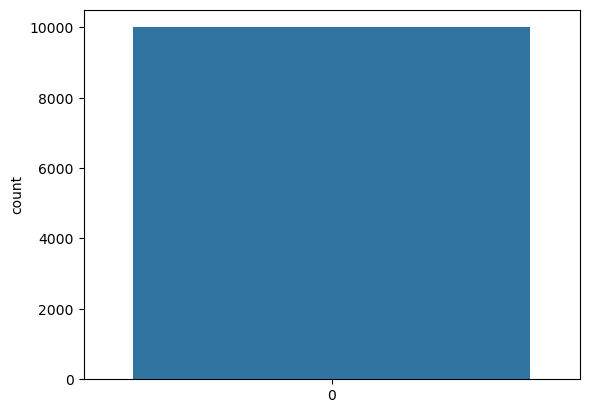

In [15]:
import seaborn as sns
sns.countplot(data['Exited'])

In [16]:
X = data.drop('Exited',axis= 1)
y = data['Exited']

In [17]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred1 = log.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred1)

0.808

In [28]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [29]:
precision_score(y_test, y_pred1)

0.5891472868217055

In [30]:
recall_score(y_test, y_pred1)

0.18673218673218672

In [31]:
f1_score(y_test, y_pred1)

0.2835820895522388

In [32]:
# Handling Imbalanced  Data with Smote

In [33]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)

In [34]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [35]:
# Splitting the dataset

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
print(X_res.shape)
print(y_res.shape)

(15926, 11)
(15926,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [39]:
# Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
X_train

array([[ 1.43138403, -0.80610675,  0.07045686, ..., -0.57590009,
        -0.46487958, -0.84333598],
       [ 1.09386187,  0.0939546 , -1.40225917, ..., -0.57590009,
        -0.46487958,  1.18576702],
       [-0.19089992,  0.39397505, -1.03408016, ..., -0.57590009,
         2.15109472, -0.84333598],
       ...,
       [ 0.20106131,  0.19396141,  1.17499388, ..., -0.57590009,
        -0.46487958,  1.18576702],
       [-0.81150519, -0.60609312,  0.43863587, ..., -0.57590009,
        -0.46487958,  1.18576702],
       [ 0.52769566,  0.99401594, -1.40225917, ...,  1.73641229,
        -0.46487958,  1.18576702]])

In [42]:
# Logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred1 = log.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7912743251726303

In [47]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test, y_pred1)


0.7744128553770087

In [48]:
recall_score(y_test, y_pred1)

0.8068254990341275

In [49]:
f1_score(y_test, y_pred1)

0.7902869757174393

# SVC

In [50]:
from sklearn import svm
svm = svm.SVC()

In [51]:
svm.fit(X_train,y_train)

SVC()

In [52]:
y_pred2=svm.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred2)

0.8443188951663528

In [54]:
precision_score(y_test,y_pred2)

0.8347055098163395

# KNeighbors Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
y_pred3 = knn.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred3)

0.8308223477715003

In [58]:
precision_score(y_test,y_pred3)

0.8118081180811808

# Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt = DecisionTreeClassifier()

In [61]:
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [62]:
y_pred4 = dt.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred4)

0.7897049591964846

In [64]:
precision_score(y_test,y_pred4)

0.7723627390499691

# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
y_pred5 = rf.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred5)

0.8625235404896422

In [70]:
precision_score(y_test,y_pred5)

0.851291745431632

# Gradient Boosting Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbc = GradientBoostingClassifier()

In [73]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [74]:
y_pred6 = gbc.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred6)

0.842435655994978

In [76]:
precision_score(y_test, y_pred6)

0.8392511297611362

In [77]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),
                                  accuracy_score(y_test,y_pred6)]})
                                                                             

In [78]:
final_data

Models       ACC
0     LR  0.791274
1    SVC  0.844319
2    KNN  0.830822
3     DT  0.789705
4     RF  0.862524
5    GBC  0.842436

In [79]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

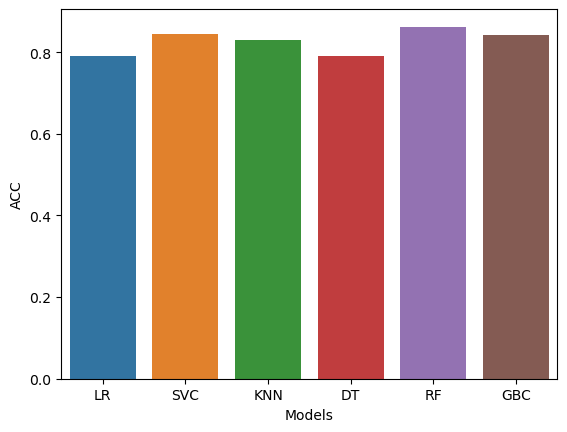

In [81]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [82]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'PRE':[precision_score(y_test,y_pred1),
                                  precision_score(y_test,y_pred2),
                                  precision_score(y_test,y_pred3),
                                  precision_score(y_test,y_pred4),
                                  precision_score(y_test,y_pred5),
                                  precision_score(y_test,y_pred6)]})

In [83]:
final_data

Models       PRE
0     LR  0.774413
1    SVC  0.834706
2    KNN  0.811808
3     DT  0.772363
4     RF  0.851292
5    GBC  0.839251

<Axes: xlabel='Models', ylabel='PRE'>

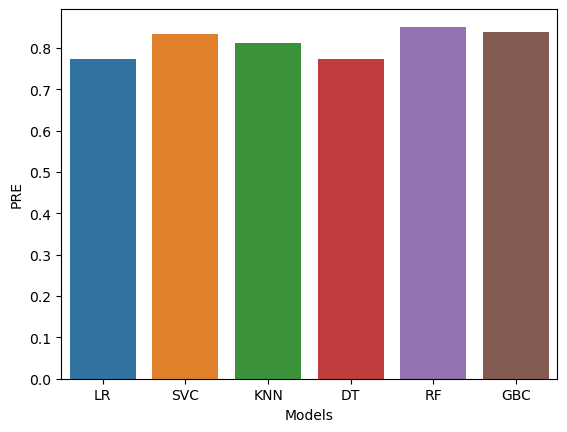

In [84]:
sns.barplot(x='Models', y='PRE', data=final_data)

# Save the Model

In [85]:
X_res = sc.fit_transform(X_res)

In [86]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [87]:
import joblib

In [88]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [89]:
model = joblib.load('churn_predict_model')

In [90]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [92]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

# GUI

In [93]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 ==1:
        Geography_German=1
        Geography_Spain=0
        Geography_France=0
    elif p9 == 2:
        Geography_German=0
        Geography_Spain=1
        Geography_France=0
    p10= int(e10.get())
    model = joblib.load('churn_model')
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                           p5,p6,
                           p7,p8,Geography_Germany,Geography_Spain,p10]]))
    if result == 0:
        Label(master, text="No Exit").grid(row=31)
    else:
        Label(master, text="Exit").grid(row=31)
    
master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")


label = Label(master,text="Customers Churn Prediction Using ML"
                         ,bg = "black",fg="white"). \
                             grid(row=0,columnspan=2)
        
Label(master, text="CreditScore").grid(rows=1)
Label(master, text="Age").grid(rows=2)
Label(master, text="Tenure").grid(rows=3)
Label(master, text="Balance").grid(rows=4)
Label(master, text="NumofProducts").grid(rows=5)
Label(master, text="HasCrCard").grid(rows=6)
Label(master, text="IsActiveMember").grid(rows=7)
Label(master, text="EstimatedSalary").grid(rows=8)
Label(master, text="Geography").grid(rows=9)
Label(master, text="Gender").grid(rows=10)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6= Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()
mainloop()